# Cavour - PoliTo Rocket Team 

Launched at EUROC'23, achieved the target apogee of 3000 meters, however the flight was balistic.
Permission to use flight data given by Edoardo Viglietti, 2024.

These results were extracted out of the flight card:

1. Team number: `17`
2. Launch date: `October 13th, 2023. around 14.30hrs local time`
3. Last simulated apogee before flight: `2806 m` 
4. Official recorded apogee: `2789 m`

The relative error of altitude apogee is only `0.6%`

Note that the simulated apogee below differs from the value obtained before the flight because of upgrades made to the rocketpy software and also because the wind profile represented below differs from the one registered at the launch site. 

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt

from rocketpy import Environment, Flight, Function, Rocket, SolidMotor

plt.style.use("seaborn-v0_8-colorblind")

## Environment registered by windy


Gravity Details

Acceleration of gravity at surface level:    9.8066 m/s²
Acceleration of gravity at   4.000 km (ASL): 9.8066 m/s²


Launch Site Details

Launch Date: 2023-10-13 12:00:00 UTC | 2023-10-13 13:00:00 Portugal
Launch Site Latitude: 39.38869°
Launch Site Longitude: -8.28781°
Reference Datum: WGS84
Launch Site UTM coordinates: 44507.97 W    4373270.52 N
Launch Site UTM zone: 30S
Launch Site Surface Elevation: 150.0 m


Atmospheric Model Details

Atmospheric Model Type: Reanalysis
Reanalysis Maximum Height: 4.000 km
Reanalysis Time Period: from 2023-10-12 08:00:00 to 2023-10-15 18:00:00 utc
Reanalysis Hour Interval: 1 hrs
Reanalysis Latitude Range: From 40.0° to 39.0°
Reanalysis Longitude Range: From -9.0° to -7.0°

Surface Atmospheric Conditions

Surface Wind Speed: 3.06 m/s
Surface Wind Direction: 168.81°
Surface Wind Heading: 348.81°
Surface Pressure: 1000.00 hPa
Surface Temperature: 296.08 K
Surface Air Density: 1.177 kg/m³
Surface Speed of Sound: 344.94 m/s


Earth Model

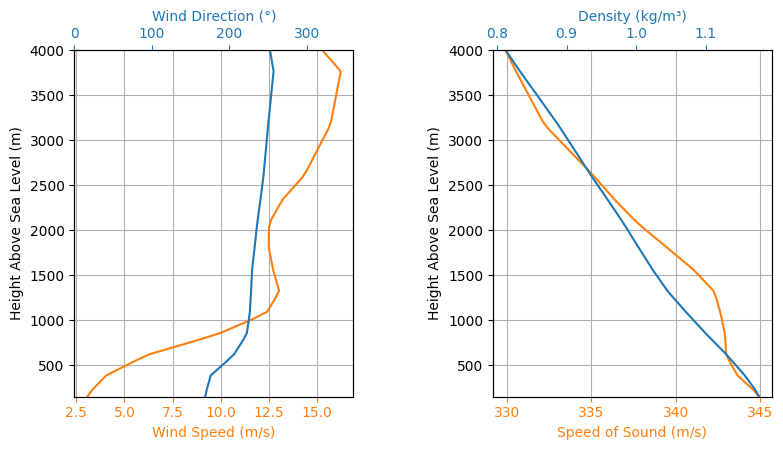

In [3]:
env = Environment(
    gravity=9.80665,
    date=(2023, 10, 13, 13),
    latitude=39.388692,
    longitude=-8.287814,
    elevation=150,
    datum="WGS84",
    timezone="Portugal",
)

env.set_atmospheric_model(
    type="Reanalysis",
    file="../../data/weather/euroc_2023_all_windows.nc",
    dictionary="ECMWF",
)
env.max_expected_height = 4000
env.info()

## Motor

In [4]:
ProL995 = SolidMotor(
    thrust_source="../../data/motors/cesaroni/Cesaroni_3618L995-P.eng",
    burn_time=3.8,
    grain_number=3,
    grain_density=1653.53,
    grain_initial_inner_radius=0.011375,
    grain_outer_radius=0.0325,
    grain_initial_height=0.13244,
    nozzle_radius=0.0335,
    throat_radius=0.0114,
    grain_separation=0.001,
    grains_center_of_mass_position=0.19966000000000006,
    dry_inertia=(0, 0, 0),
    center_of_dry_mass_position=1.1994,
    dry_mass=0,
)

Nozzle Details
Nozzle Radius: 0.0335 m
Nozzle Throat Radius: 0.0114 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.001 m
Grain Density: 1653.53 kg/m3
Grain Outer Radius: 0.0325 m
Grain Inner Radius: 0.011375 m
Grain Height: 0.13244 m
Grain Volume: 0.000 m3
Grain Mass: 0.638 kg

Motor Details
Total Burning Time: 3.8 s
Total Propellant Mass: 1.913 kg
Structural Mass Ratio: 0.000
Average Propellant Exhaust Velocity: 1891.254 m/s
Average Thrust: 952.100 N
Maximum Thrust: 1280.0 N at 1.2 s after ignition.
Total Impulse: 3617.980 Ns



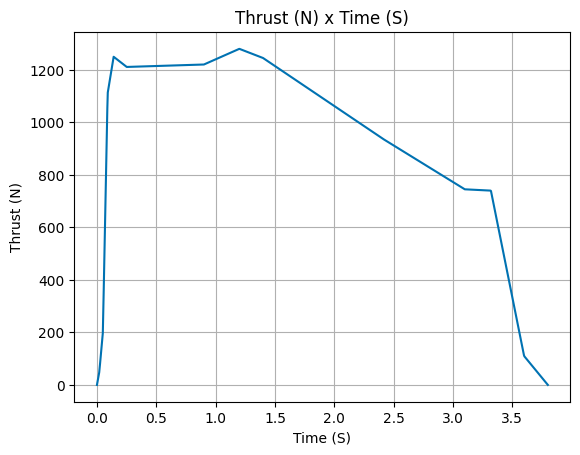

In [5]:
ProL995.info()

## Rocket and Aerodynamic surfaces

For comparison purposes, no parachute will be added to the simulation

In [6]:
# this drag curve comes from RASAero II
Cavour = Rocket(
    radius=0.052,
    mass=8.219,
    inertia=(4.449, 4.449, 0.014634),
    center_of_mass_without_motor=1.1994,
    power_off_drag="../../data/rockets/polito/drag_coefficient_power_off.csv",
    power_on_drag="../../data/rockets/polito/drag_coefficient_power_on.csv",
    coordinate_system_orientation="tail_to_nose",
)

Cavour.set_rail_buttons(1.0954, 0.005400000000000071)

Cavour.add_motor(ProL995, position=0)

In [7]:
NoseCone = Cavour.add_nose(
    length=0.52,
    kind="vonKarman",
    position=2.7224,
)

FinSet = Cavour.add_trapezoidal_fins(
    n=4,
    span=0.1,
    root_chord=0.2,
    tip_chord=0.07,
    position=0.2104,
)

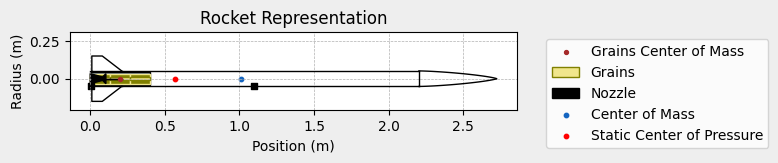

In [8]:
Cavour.draw()

## Flight Simulation DATA

In [9]:
test_flight = Flight(
    rocket=Cavour, environment=env, inclination=84, heading=133, rail_length=12
)


Apogee State

Apogee Time: 22.519 s
Apogee Altitude: 2967.405 m (ASL) | 2817.405 m (AGL)
Apogee Freestream Speed: 23.296 m/s
Apogee X position: 482.888 m
Apogee Y position: -511.993 m
Apogee latitude: 39.3840864°
Apogee longitude: -8.2821941°


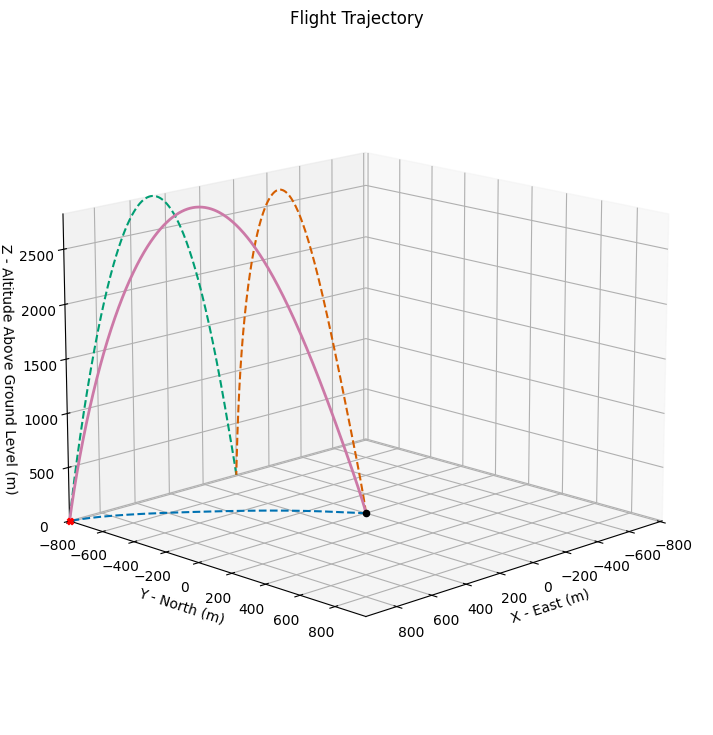

In [10]:
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()

## Data analysis

In [11]:
from rocketpy.simulation.flight_data_importer import FlightDataImporter

columns_map = {
    "ts": "time",
    "altitude[m]": "altitude",
    "velocity[m/s]": "vz",
}

cots_altimeter_flight = FlightDataImporter(
    name="COTS Altimeter Flight",
    paths="../../data/rockets/polito/altimeter_cavour.csv",
    columns_map=columns_map,
    units=None,
    interpolation="linear",
    extrapolation="zero",
    delimiter=",",
    encoding="utf-8",
)

The following attributes were create and are now available to be used:  ['time', 'altitude', 'vz']


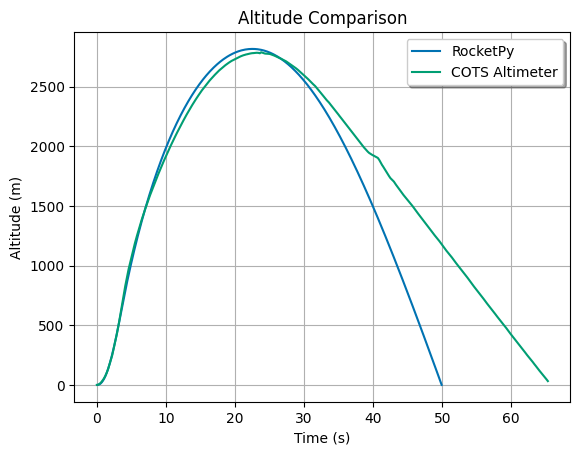

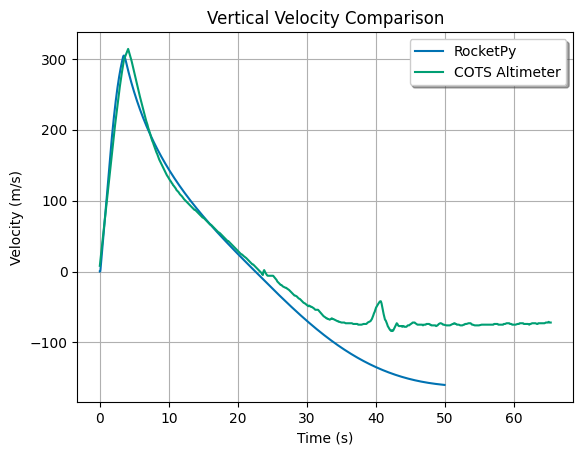

In [12]:
Function.compare_plots(
    [
        (test_flight.altitude, "RocketPy"),
        (cots_altimeter_flight.altitude, "COTS Altimeter"),
    ],
    title="Altitude Comparison",
    xlabel="Time (s)",
    ylabel="Altitude (m)",
)

Function.compare_plots(
    [
        (test_flight.vz, "RocketPy"),
        (cots_altimeter_flight.vz, "COTS Altimeter"),
    ],
    title="Vertical Velocity Comparison",
    xlabel="Time (s)",
    ylabel="Velocity (m/s)",
)